In [1]:
import drjit as dr
import mitsuba as mi
from matplotlib import pyplot as plt

In [2]:
def gen_scene(radiance, reflectance):
    return mi.load_dict({
        'type': 'scene',
        'integrator': { 
            'type': 'direct' 
        },
        'light': { 
            'type': 'constant',
            'radiance': radiance
        },
        'sphere' : {
            'type': 'sphere',
            'bsdf': {
                'type': 'diffuse',
                'reflectance': reflectance
            }
        },
        'sensor': {
            'type': 'perspective',
            'to_world': mi.ScalarTransform4f.look_at(origin=[0, -5, 0], 
                                                     target=[0, 0, 0], 
                                                     up=[0, 0, 1]),
            'film': {
                'type': 'hdrfilm',
                'width': 64,
                'height': 64,
                'pixel_format': 'rgb',
            },
        }
    })

In [3]:
def plot_image(ax, radiance, reflectance):
    scene = gen_scene(radiance, reflectance)

    img = mi.render(scene, spp=1024)
    
    emitter_val = [round(val, 2) for val in list(img[0, 0, :].array)]
    shape_val = [round(val, 2) for val in list(img[32, 32, :].array)]
    
    radiance_str    = str(radiance).replace("{'type': ", "").replace("}", "").replace("'value': ", "")
    reflectance_str = str(reflectance).replace("{'type': ", "").replace("}", "").replace("'value': ", "")
    
    ax.imshow(dr.clip(img, 0.0, 1.0))
    ax.text(x=1, y=3, s=emitter_val)    
    ax.text(x=22, y=32, s=str(shape_val))
    ax.text(x=2, y=61, s=f'emitter: {radiance_str}\nBSDF: {reflectance_str}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [4]:
radiances = [
    {'type': 'rgb', 'value': 1.0},
    {'type': 'spectrum', 'value': 1.0},
    {'type': 'spectrum', 'value': [(300, 1.0), (700, 1.0)]},
]

reflectances = [
    {'type': 'rgb', 'value': 0.5},
    {'type': 'spectrum', 'value': 0.5},
    {'type': 'spectrum', 'value': [(300, 0.5), (700, 0.5)]},
]

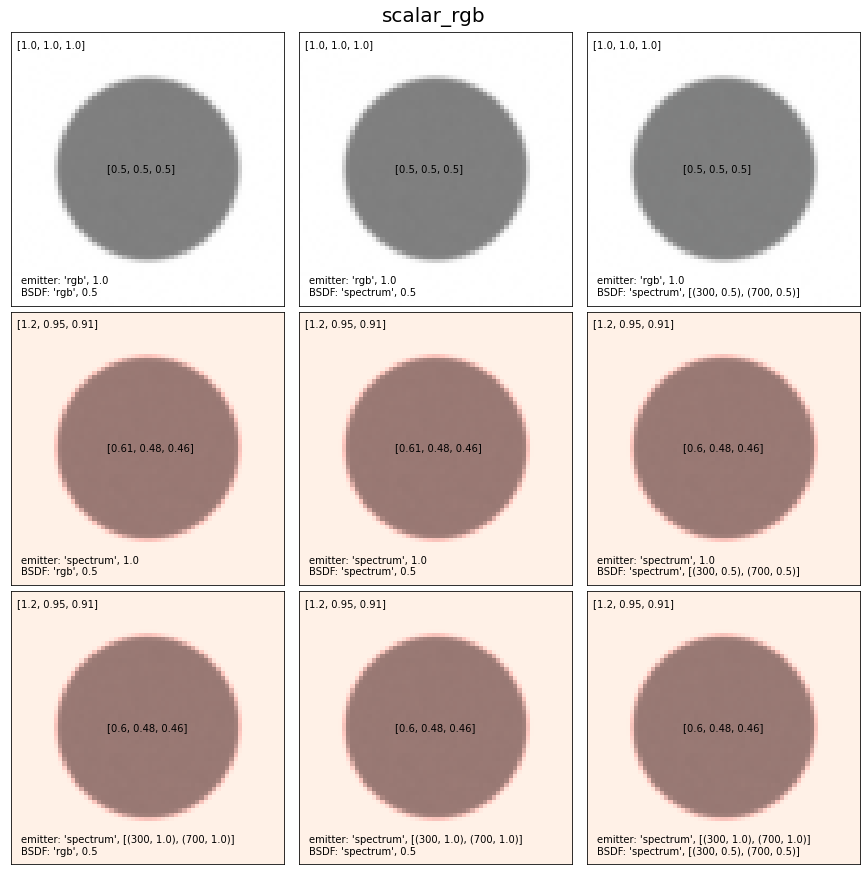

In [5]:
mi.set_variant('scalar_rgb')

fig, axs = plt.subplots(3, 3, figsize=(12, 12), constrained_layout=True)

fig.suptitle('scalar_rgb', fontsize=20)

for i, radiance in enumerate(radiances):
    for j, reflectance in enumerate(reflectances):  
        plot_image(
            axs[i][j], 
            radiance, 
            reflectance
        )

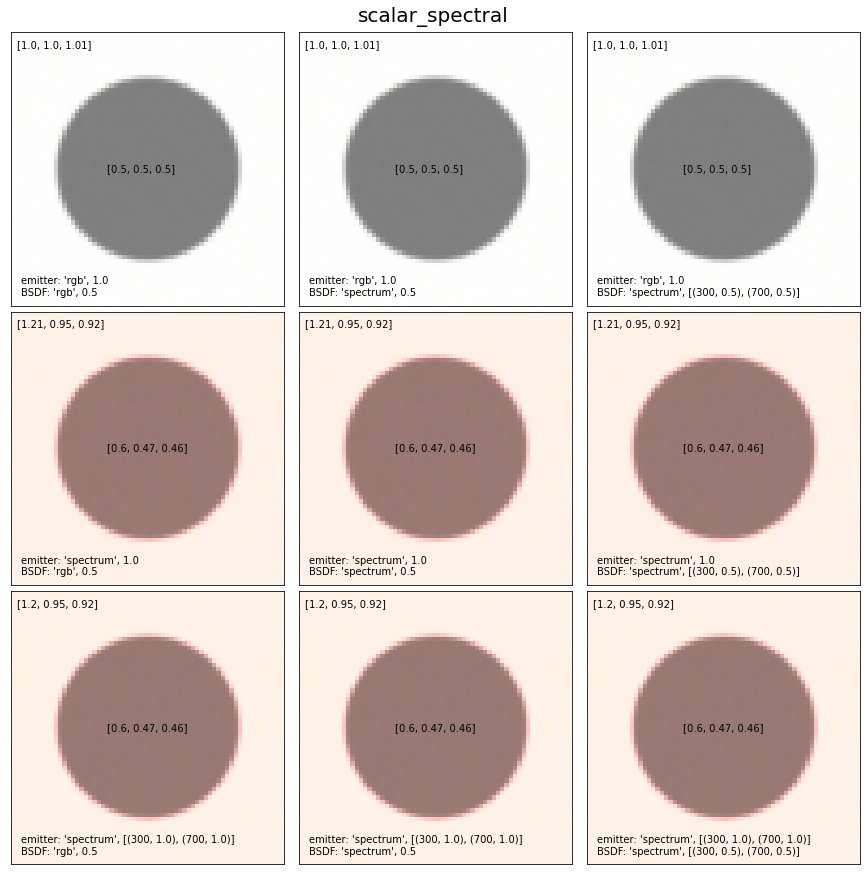

In [7]:
mi.set_variant('scalar_spectral')

fig, axs = plt.subplots(3, 3, figsize=(12, 12), constrained_layout=True)
fig.suptitle('scalar_spectral', fontsize=20)
for i, radiance in enumerate(radiances):
    for j, reflectance in enumerate(reflectances):  
        plot_image(
            axs[i][j], 
            radiance, 
            reflectance
        )